## Online Sales Analysis

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset

In [2]:
sales_df = pd.read_csv('online_sales_dataset.csv')
sales_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High


In [3]:
sales_df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
22716,205696,SKU_1095,White Mug,27,2022-08-04 12:00,64.36,45266.0,Netherlands,0.34,Credit Card,10.94,Accessories,In-store,Not Returned,FedEx,Berlin,High
23444,637443,SKU_1775,USB Cable,45,2022-09-03 20:00,69.49,14253.0,United States,0.29,Credit Card,19.39,Electronics,Online,Not Returned,Royal Mail,Berlin,Low
31600,872148,SKU_1387,Wall Clock,7,2023-08-09 16:00,28.28,17236.0,Belgium,0.05,Credit Card,6.71,Furniture,Online,Returned,UPS,London,High


In [4]:
sales_df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


## Dataset Cleaning

#### Duplicates Removal

In [5]:
sales_df.duplicated().sum()

0

#### Dataset Information

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

#### Missing Values

In [7]:
sales_df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

## Statistics

In [8]:
sales_df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


#### Correlations 

In [9]:
sales_df.select_dtypes(include=['int','float']).corr()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
InvoiceNo,1.000000,-0.004980,-0.016436,0.000730,0.011413,0.001441
Quantity,-0.004980,1.000000,0.241028,0.002889,-0.290293,-0.004086
UnitPrice,-0.016436,0.241028,1.000000,0.000065,-0.329025,0.003112
CustomerID,0.000730,0.002889,0.000065,1.000000,0.010822,0.004071
Discount,0.011413,-0.290293,-0.329025,0.010822,1.000000,-0.001282
ShippingCost,0.001441,-0.004086,0.003112,0.004071,-0.001282,1.000000


#### Columns Standardization

In [10]:
sales_df['StockCode'] = sales_df['StockCode'].apply(lambda x: int(x.lstrip('SKU_')))

In [11]:
sales_df['Quantity'] = sales_df['Quantity'].apply(lambda x: np.abs(x))

In [12]:
sales_df['UnitPrice'] = sales_df['UnitPrice'].apply(lambda x: np.round(np.abs(x), 2))

In [13]:
sales_df['Discount'] = sales_df['Discount'].apply(lambda x: np.round(x, 2))

In [14]:
sales_df['PaymentMethod'] = sales_df['PaymentMethod'].apply(lambda x: 'Pay Pal' if x == 'paypall' else x)

#### Correcting 'Category' and 'Description' Column

In [15]:
sales_df.groupby(by=['Category', 'Description']).size()

Category     Description   
Accessories  Backpack          918
             Blue Pen          884
             Desk Lamp         892
             Headphones        878
             Notebook          924
             Office Chair      919
             T-shirt           873
             USB Cable         898
             Wall Clock        949
             White Mug         940
             Wireless Mouse    900
Apparel      Backpack          875
             Blue Pen          906
             Desk Lamp         915
             Headphones        926
             Notebook          856
             Office Chair      892
             T-shirt           923
             USB Cable         926
             Wall Clock        915
             White Mug         852
             Wireless Mouse    878
Electronics  Backpack          895
             Blue Pen          899
             Desk Lamp         918
             Headphones        917
             Notebook          871
             Office Chair  

In [16]:
Category = {
    'Backpack': 'Accessory',  
    'Blue Pen': 'Stationer',
    'Notebook': 'Stationer',
    'Office Chair': 'Furniture',
    'Wall Clock': 'Accessory',
    'White Mug': 'Accessory',
    'Wireless Mouse': 'Electronics',
    'USB Cable': 'Electronics',
    'Headphones': 'Electronics',
    'T-shirt': 'Apparel',
    'Desk Lamp':'Accessory'
}

sales_df['Category'] = sales_df['Description'].map(Category)
sales_df.groupby(['Category', 'Description']).size()

Category     Description   
Accessory    Backpack          4550
             Desk Lamp         4545
             Wall Clock        4617
             White Mug         4536
Apparel      T-shirt           4466
Electronics  Headphones        4555
             USB Cable         4580
             Wireless Mouse    4448
Furniture    Office Chair      4522
Stationer    Blue Pen          4509
             Notebook          4454
dtype: int64

#### Handle Missings

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
sales_df['CustomerID'].fillna('Unknown', inplace=True)

In [19]:
sales_df['ShippingCost'].fillna(sales_df['ShippingCost'].mean(), inplace=True)

In [20]:
locs = sales_df['WarehouseLocation'].dropna().unique()
sales_df['WarehouseLocation'].fillna(np.random.choice(locs), inplace=True)

In [21]:
sales_df.isnull().sum().sum()

0

## Feature Engineering

In [22]:
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

In [23]:
sales_df['InvoiceYear'] = sales_df['InvoiceDate'].dt.year
sales_df['InvoiceMonth'] = sales_df['InvoiceDate'].dt.month_name()

In [24]:
sales_df.drop(columns=['InvoiceDate'], inplace=True)

In [25]:
sales_df['TotalCost'] = (sales_df['Quantity'] * sales_df['UnitPrice']) - (sales_df['Quantity'] * sales_df['UnitPrice']*sales_df['Discount']) + sales_df['ShippingCost']
sales_df['TotalCost'] = np.round(sales_df['TotalCost'], 2)

## EDA

#### Column : 'InvoiceNo'

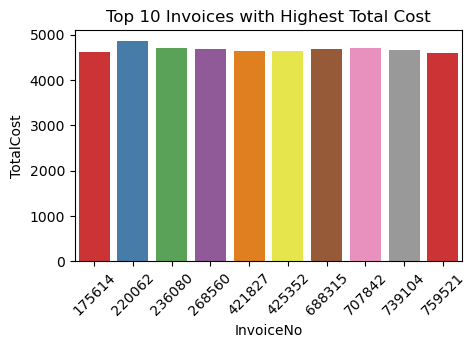

In [26]:
top_10_invoice_with_highest_total_cost = sales_df.sort_values(by=['TotalCost'],ascending=False, ignore_index=True)[['InvoiceNo', 'TotalCost']][:10]

plt.figure(figsize=(5,3))
sns.barplot(x = 'InvoiceNo', y = 'TotalCost', data = top_10_invoice_with_highest_total_cost, palette='Set1')
plt.title('Top 10 Invoices with Highest Total Cost')
plt.xticks(rotation=45)
plt.show()

#### Column : Description

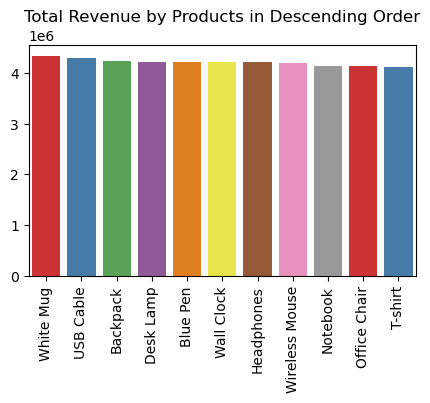

In [27]:
total_revenue_by_each_product = pd.Series(dict(sales_df.groupby(by=['Description'])['TotalCost'].sum('TotalCost').sort_values(ascending=False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_revenue_by_each_product.index, y = total_revenue_by_each_product, palette='Set1')
plt.title('Total Revenue by Products in Descending Order')
plt.xticks(rotation=90)
plt.show()

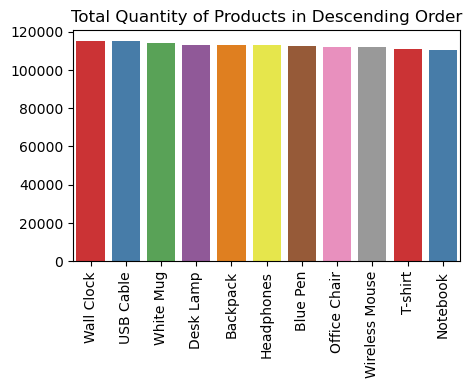

In [28]:
total_quantity_by_each_product = pd.Series(dict(sales_df.groupby(by=['Description'])['Quantity'].sum('Quantity').sort_values(ascending=False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_quantity_by_each_product.index, y = total_quantity_by_each_product, palette='Set1')
plt.title('Total Quantity of Products in Descending Order')
plt.xticks(rotation=90)
plt.show()

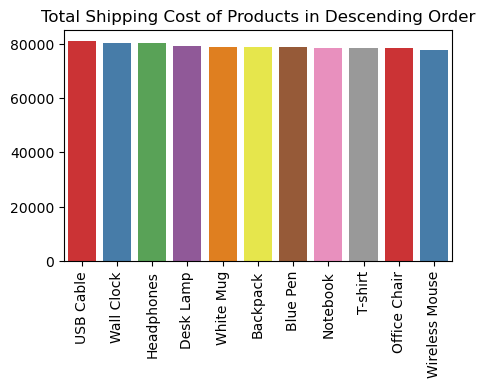

In [29]:
shipping_cost_of_products = pd.Series(dict(sales_df.groupby(by=['Description'])['ShippingCost'].sum('ShippingCost').sort_values(ascending=False)))

plt.figure(figsize=(5,3))
sns.barplot(x = shipping_cost_of_products.index, y = shipping_cost_of_products, palette='Set1')
plt.title('Total Shipping Cost of Products in Descending Order')
plt.xticks(rotation=90)
plt.show()

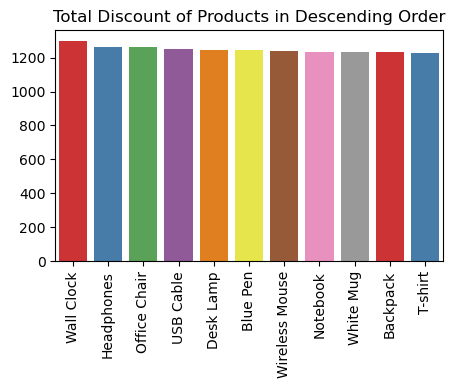

In [30]:
discount_of_products = pd.Series(dict(sales_df.groupby(by=['Description'])['Discount'].sum('Discount').sort_values(ascending=False)))

plt.figure(figsize=(5,3))
sns.barplot(x = discount_of_products.index, y = discount_of_products, palette='Set1')
plt.title('Total Discount of Products in Descending Order')
plt.xticks(rotation=90)
plt.show()

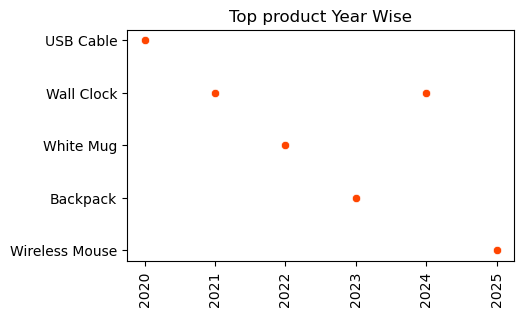

In [31]:
top_product_year_wise = sales_df.groupby(by=['InvoiceYear', 'Description'])[['TotalCost','Description']].sum('TotalCost').sort_values(by = 'TotalCost', ascending = False).index

top_products = {}

for year in sales_df['InvoiceYear'].unique():
    for yr, product in top_product_year_wise:
        if year == yr:
            top_products[year] = product
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_products.keys(), y = top_products.values(), color = 'orangered')
plt.xticks(rotation = 90)
plt.title('Top product Year Wise')
plt.show()

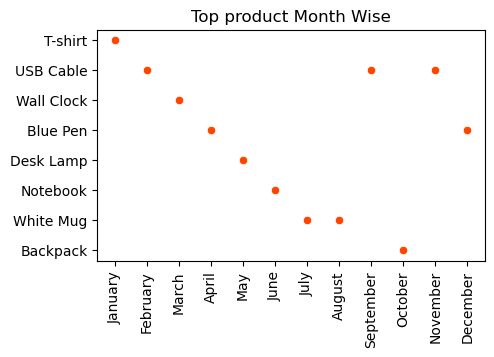

In [32]:
top_product_month_wise = sales_df.groupby(by=['InvoiceMonth', 'Description'])[['TotalCost','Description']].sum('TotalCost').sort_values(by = 'TotalCost', ascending = False).index

top_products = {}

for month in sales_df['InvoiceMonth'].unique():
    for m, product in top_product_month_wise:
        if month == m:
            top_products[month] = product
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_products.keys(), y = top_products.values(), color = 'orangered')
plt.xticks(rotation = 90)
plt.title('Top product Month Wise')
plt.show()

#### Column : Quantity

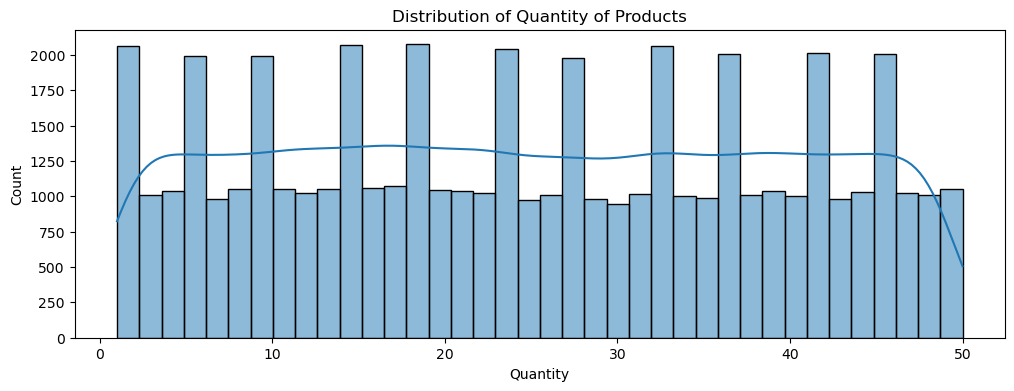

In [33]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Quantity', data = sales_df, kde=True)
plt.title('Distribution of Quantity of Products')
plt.show()

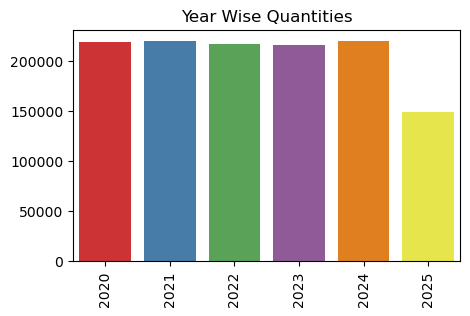

In [34]:
year_wise_quantities = pd.Series(dict(sales_df.groupby(by='InvoiceYear')['Quantity'].sum(['Quantity']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = year_wise_quantities.index, y = year_wise_quantities, palette='Set1')
plt.title('Year Wise Quantities')
plt.xticks(rotation=90)
plt.show()

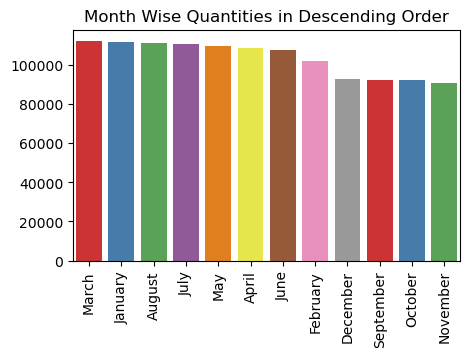

In [35]:
month_wise_quantities = pd.Series(dict(sales_df.groupby(by='InvoiceMonth')['Quantity'].sum(['Quantity']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = month_wise_quantities.index, y = month_wise_quantities, palette='Set1')
plt.title('Month Wise Quantities in Descending Order')
plt.xticks(rotation=90)
plt.show()

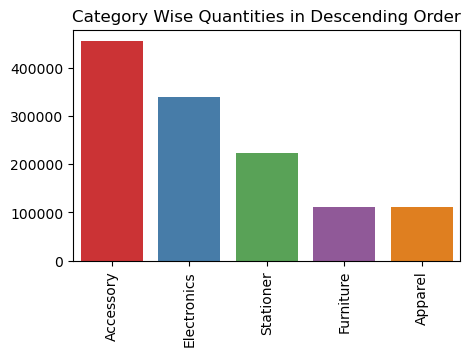

In [36]:
category_wise_quantities = pd.Series(dict(sales_df.groupby(by='Category')['Quantity'].sum(['Quantity']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = category_wise_quantities.index, y = category_wise_quantities, palette='Set1')
plt.title('Category Wise Quantities in Descending Order')
plt.xticks(rotation=90)
plt.show()

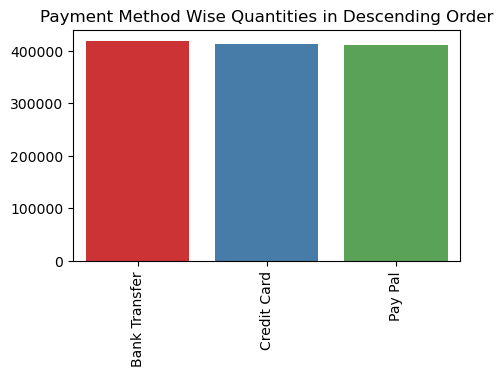

In [37]:
payment_method_wise_quantities = pd.Series(dict(sales_df.groupby(by='PaymentMethod')['Quantity'].sum(['Quantity']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = payment_method_wise_quantities.index, y = payment_method_wise_quantities, palette='Set1')
plt.title('Payment Method Wise Quantities in Descending Order')
plt.xticks(rotation=90)
plt.show()

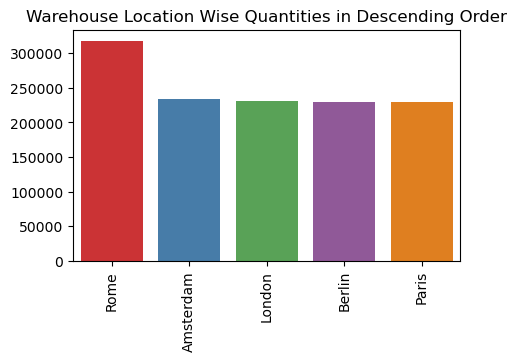

In [38]:
warehouse_loc_wise_quantities = pd.Series(dict(sales_df.groupby(by='WarehouseLocation')['Quantity'].sum(['Quantity']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = warehouse_loc_wise_quantities.index, y = warehouse_loc_wise_quantities, palette='Set1')
plt.title('Warehouse Location Wise Quantities in Descending Order')
plt.xticks(rotation=90)
plt.show()

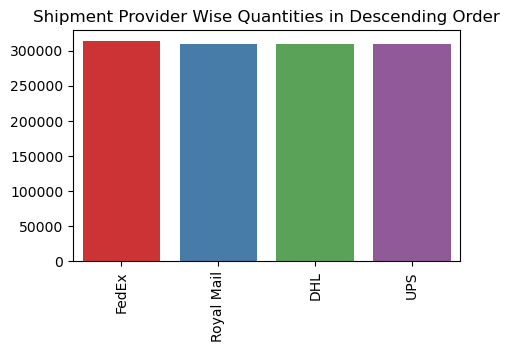

In [39]:
shipment_provider_wise_quantities = pd.Series(dict(sales_df.groupby(by='ShipmentProvider')['Quantity'].sum(['Quantity']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = shipment_provider_wise_quantities.index, y = shipment_provider_wise_quantities, palette='Set1')
plt.title('Shipment Provider Wise Quantities in Descending Order')
plt.xticks(rotation=90)
plt.show()

#### Column : UnitPrice

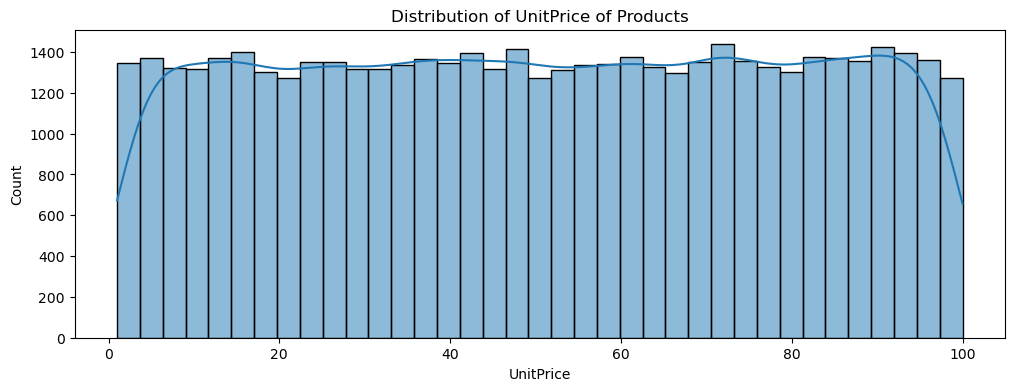

In [40]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'UnitPrice', data = sales_df, kde=True)
plt.title('Distribution of UnitPrice of Products')
plt.show()

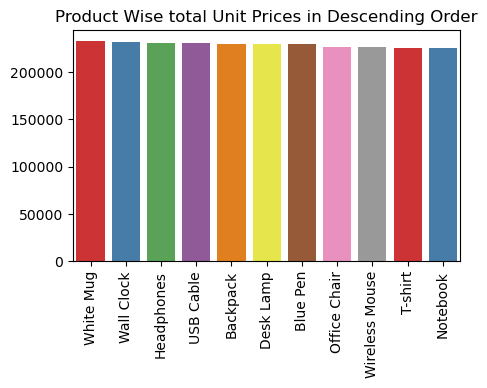

In [41]:
product_wise_unit_price = pd.Series(dict(sales_df.groupby(by='Description')['UnitPrice'].sum(['UnitPrice']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = product_wise_unit_price.index, y = product_wise_unit_price, palette='Set1')
plt.title('Product Wise total Unit Prices in Descending Order')
plt.xticks(rotation=90)
plt.show()

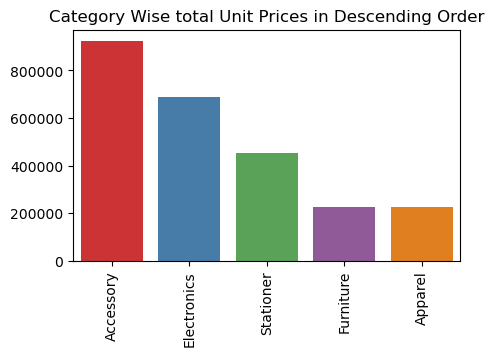

In [42]:
category_wise_unit_price = pd.Series(dict(sales_df.groupby(by='Category')['UnitPrice'].sum(['UnitPrice']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = category_wise_unit_price.index, y = category_wise_unit_price, palette='Set1')
plt.title('Category Wise total Unit Prices in Descending Order')
plt.xticks(rotation=90)
plt.show()

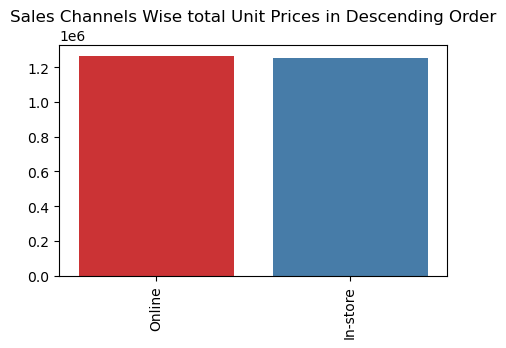

In [43]:
sales_channels_wise_unit_price = pd.Series(dict(sales_df.groupby(by='SalesChannel')['UnitPrice'].sum(['UnitPrice']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = sales_channels_wise_unit_price.index, y = sales_channels_wise_unit_price, palette='Set1')
plt.title('Sales Channels Wise total Unit Prices in Descending Order')
plt.xticks(rotation=90)
plt.show()

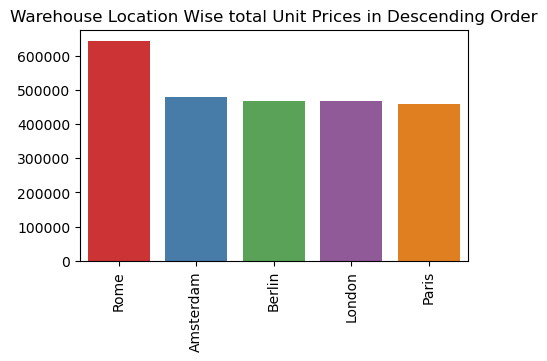

In [44]:
warehouse_wise_unit_price = pd.Series(dict(sales_df.groupby(by='WarehouseLocation')['UnitPrice'].sum(['UnitPrice']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = warehouse_wise_unit_price.index, y = warehouse_wise_unit_price, palette='Set1')
plt.title('Warehouse Location Wise total Unit Prices in Descending Order')
plt.xticks(rotation=90)
plt.show()

#### Column : CustomerId

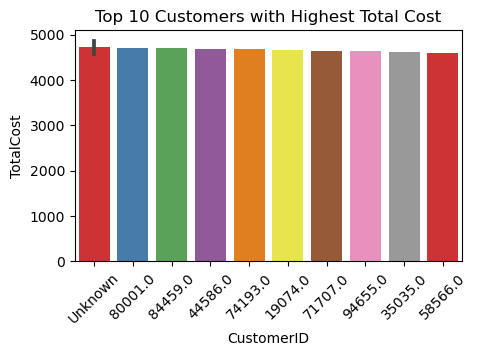

In [45]:
top_10_customers = sales_df.sort_values(by=['TotalCost'],ascending=False, ignore_index=True)[['CustomerID', 'TotalCost']][0:11]

plt.figure(figsize=(5,3))
sns.barplot(x = 'CustomerID', y = 'TotalCost', data = top_10_customers, palette='Set1')
plt.title('Top 10 Customers with Highest Total Cost')
plt.xticks(rotation=45)
plt.show()

#### Column : Country

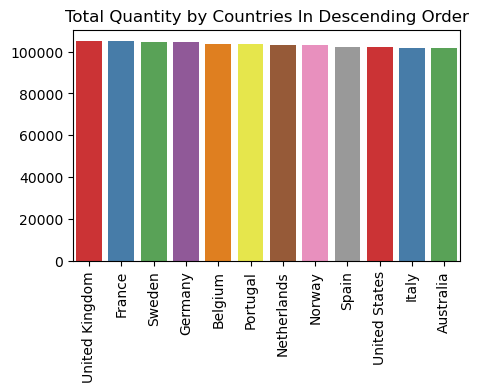

In [46]:
top_orders_by_countries = pd.Series(dict(sales_df.groupby(by='Country')['Quantity'].sum(['Quantity']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = top_orders_by_countries.index, y = top_orders_by_countries, palette='Set1')
plt.title('Total Quantity by Countries In Descending Order')
plt.xticks(rotation=90)
plt.show()

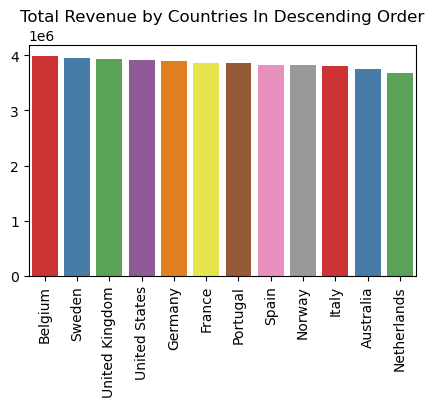

In [47]:
total_revenue_by_countries = pd.Series(dict(sales_df.groupby(by='Country')['TotalCost'].sum(['TotalCost']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_revenue_by_countries.index, y = total_revenue_by_countries, palette='Set1')
plt.title('Total Revenue by Countries In Descending Order')
plt.xticks(rotation=90)
plt.show()

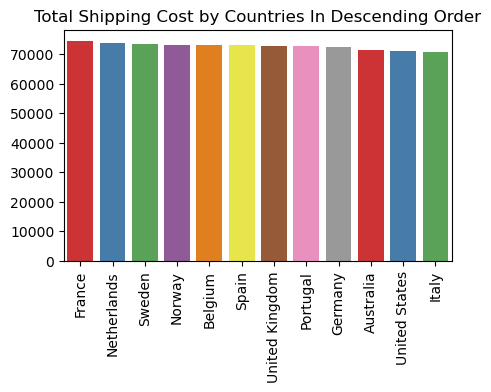

In [48]:
total_shippingcost_by_countries = pd.Series(dict(sales_df.groupby(by='Country')['ShippingCost'].sum(['ShippingCost']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_shippingcost_by_countries.index, y = total_shippingcost_by_countries, palette='Set1')
plt.title('Total Shipping Cost by Countries In Descending Order')
plt.xticks(rotation=90)
plt.show()

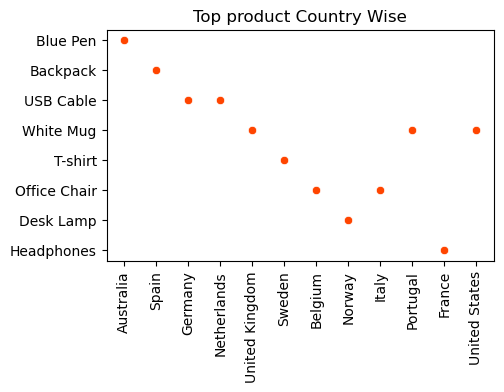

In [49]:
top_product_in_country = sales_df.groupby(by=['Country', 'Description'])[['Quantity','Description']].sum('Quantity').sort_values(by = 'Quantity', ascending = False).index

top_products = {}

for country in sales_df['Country'].unique():
    for c, product in top_product_in_country:
        if country == c:
            top_products[country] = product
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_products.keys(), y = top_products.values(), color = 'orangered')
plt.xticks(rotation = 90)
plt.title('Top product Country Wise')
plt.show()

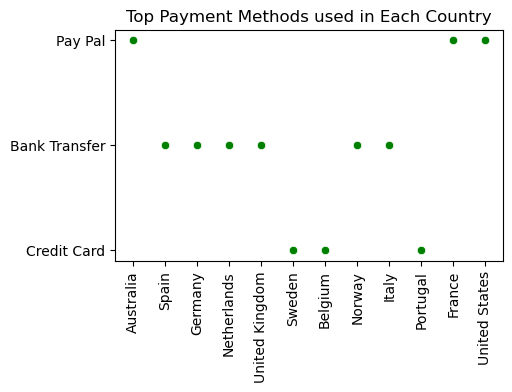

In [50]:
top_payment_method_in_country = sales_df.groupby(by = 'Country')[['Country', 'PaymentMethod']].apply(lambda x: x['PaymentMethod'].value_counts()).index

top_payment_method = {}

for country in sales_df['Country'].unique():
    for c, payment_method in top_payment_method_in_country:
        if country == c:
            top_payment_method[country] = payment_method
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_payment_method.keys(), y = top_payment_method.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Payment Methods used in Each Country')
plt.show()

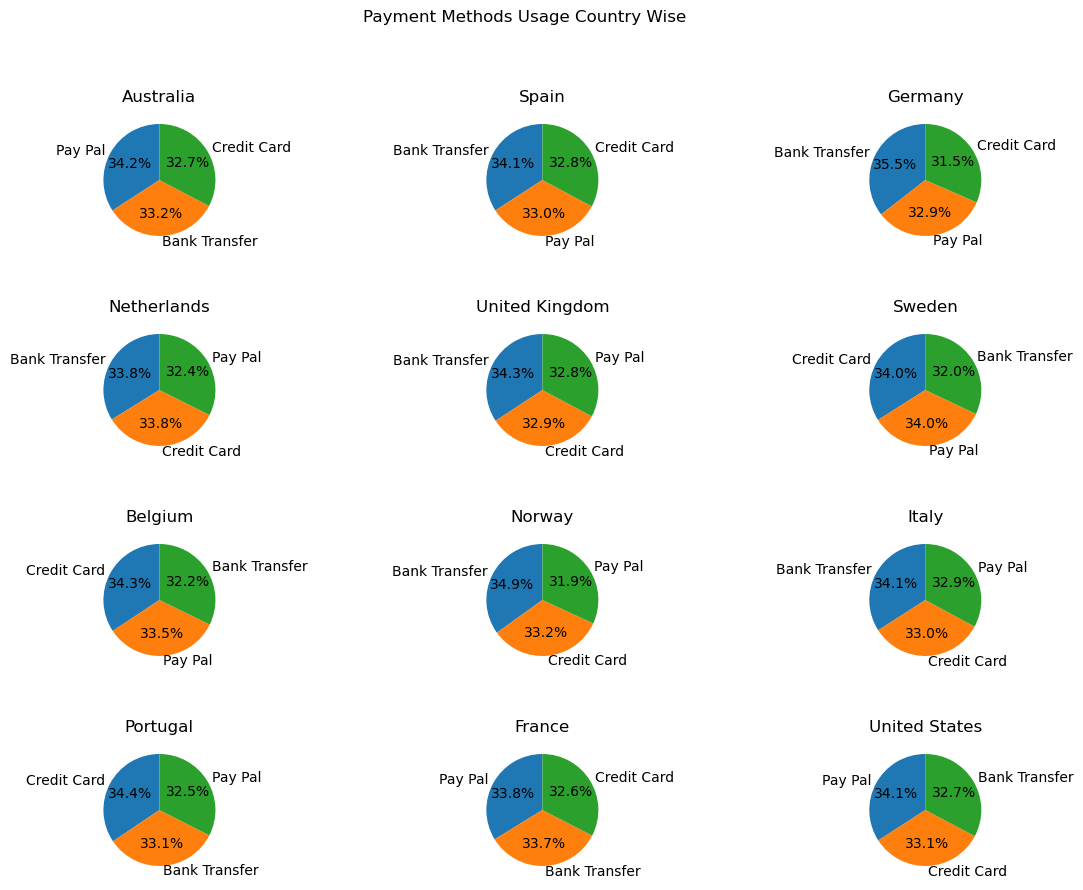

In [51]:
top_payment_method_in_country = sales_df.groupby(by = 'Country')[['Country', 'PaymentMethod']].apply(lambda x: x['PaymentMethod'].value_counts())

countries = {}

for country in sales_df['Country']:
    payments = {}
    for c, pm in top_payment_method_in_country.index:
        if c == country:
            payments[pm] = top_payment_method_in_country[(c,pm)]
            countries[c] = payments

plt.subplots(4,3, figsize = (14, 10))
plt.subplots_adjust(hspace=.5)
plot = 1
for country in countries.keys():
    plt.subplot(4,3,plot)
    plt.pie(x = countries[country].values(), autopct='%1.1f%%', labels=countries[country].keys(), startangle=90)
    plt.title(country)
    plot += 1

plt.suptitle('Payment Methods Usage Country Wise')
plt.show()

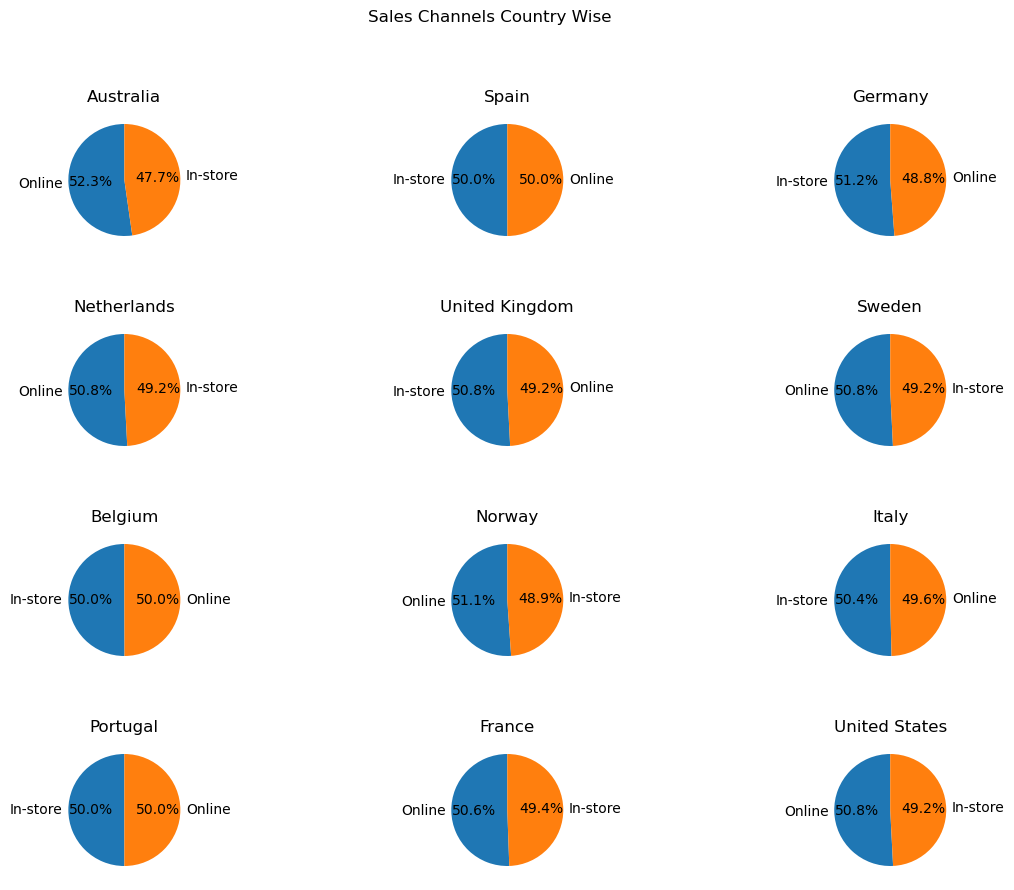

In [52]:
sales_channels_in_country = sales_df.groupby(by = 'Country')[['Country', 'SalesChannel']].apply(lambda x: x['SalesChannel'].value_counts())

countries = {}

for country in sales_df['Country']:
    channels = {}
    for c, channel in sales_channels_in_country.index:
        if c == country:
            channels[channel] = sales_channels_in_country[(c,channel)]
            countries[c] = channels

plt.subplots(4,3, figsize = (14, 10))
plt.subplots_adjust(hspace=.5)
plot = 1
for country in countries.keys():
    plt.subplot(4,3,plot)
    plt.pie(x = countries[country].values(), autopct='%1.1f%%', labels=countries[country].keys(), startangle=90)
    plt.title(country)
    plot += 1

plt.suptitle('Sales Channels Country Wise')
plt.show()

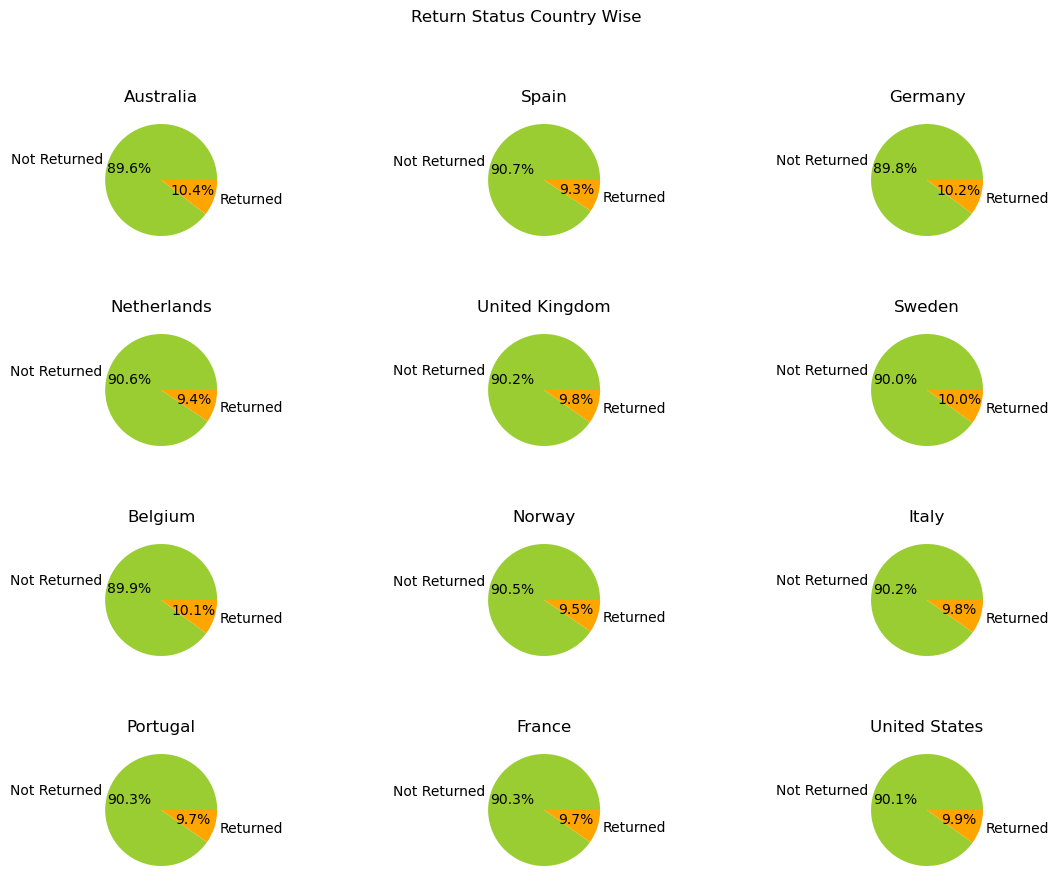

In [53]:
return_status_wrt_country = sales_df.groupby(by = 'Country')[['Country', 'ReturnStatus']].apply(lambda x: x['ReturnStatus'].value_counts())

countries = {}

for country in sales_df['Country']:
    status = {}
    for c in return_status_wrt_country.index:
        if c == country:
            status['Not Returned'] = return_status_wrt_country.loc[c,'Not Returned']
            status['Returned'] = return_status_wrt_country.loc[c,'Returned']
            countries[c] = status

plt.subplots(4,3, figsize = (14, 10))
plt.subplots_adjust(hspace=.5)
plot = 1
for country in countries.keys():
    plt.subplot(4,3,plot)
    plt.pie(x = countries[country].values(), autopct='%1.1f%%', labels=countries[country].keys(), colors=['yellowgreen','orange'])
    plt.title(country)
    plot += 1

plt.suptitle('Return Status Country Wise')
plt.show()

In [54]:
sales_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Discount', 'PaymentMethod', 'ShippingCost',
       'Category', 'SalesChannel', 'ReturnStatus', 'ShipmentProvider',
       'WarehouseLocation', 'OrderPriority', 'InvoiceYear', 'InvoiceMonth',
       'TotalCost'],
      dtype='object')

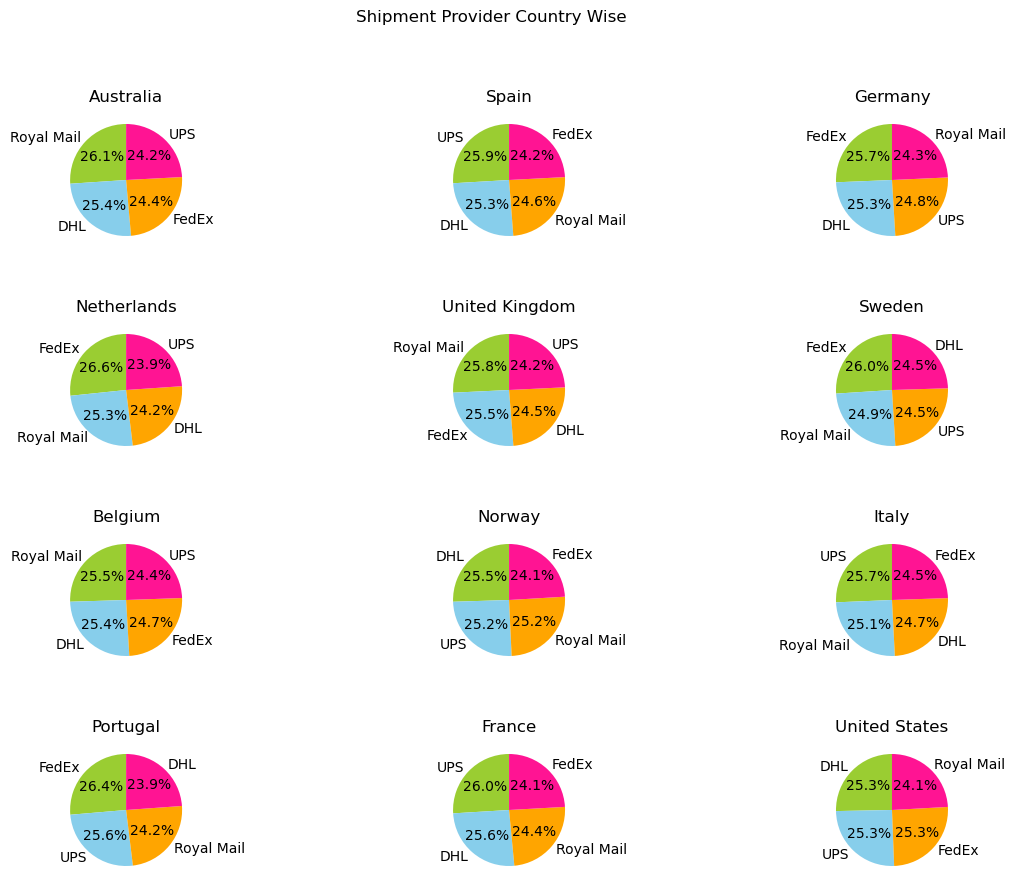

In [55]:
shipment_provider_wrt_country = sales_df.groupby(by = 'Country')[['Country', 'ShipmentProvider']].apply(lambda x: x['ShipmentProvider'].value_counts())

countries = {}

for country in sales_df['Country']:
    providers = {}
    for c, provider in shipment_provider_wrt_country.index:
        if c == country:
            providers[provider] = shipment_provider_wrt_country[(c,provider)]
            countries[c] = providers

plt.subplots(4,3, figsize = (14, 10))
plt.subplots_adjust(hspace=.5)
plot = 1
for country in countries.keys():
    plt.subplot(4,3,plot)
    plt.pie(x = countries[country].values(), autopct='%1.1f%%', labels=countries[country].keys(), startangle=90, colors = ['yellowgreen','skyblue','orange','deeppink'])
    plt.title(country)
    plot += 1

plt.suptitle('Shipment Provider Country Wise')
plt.show()

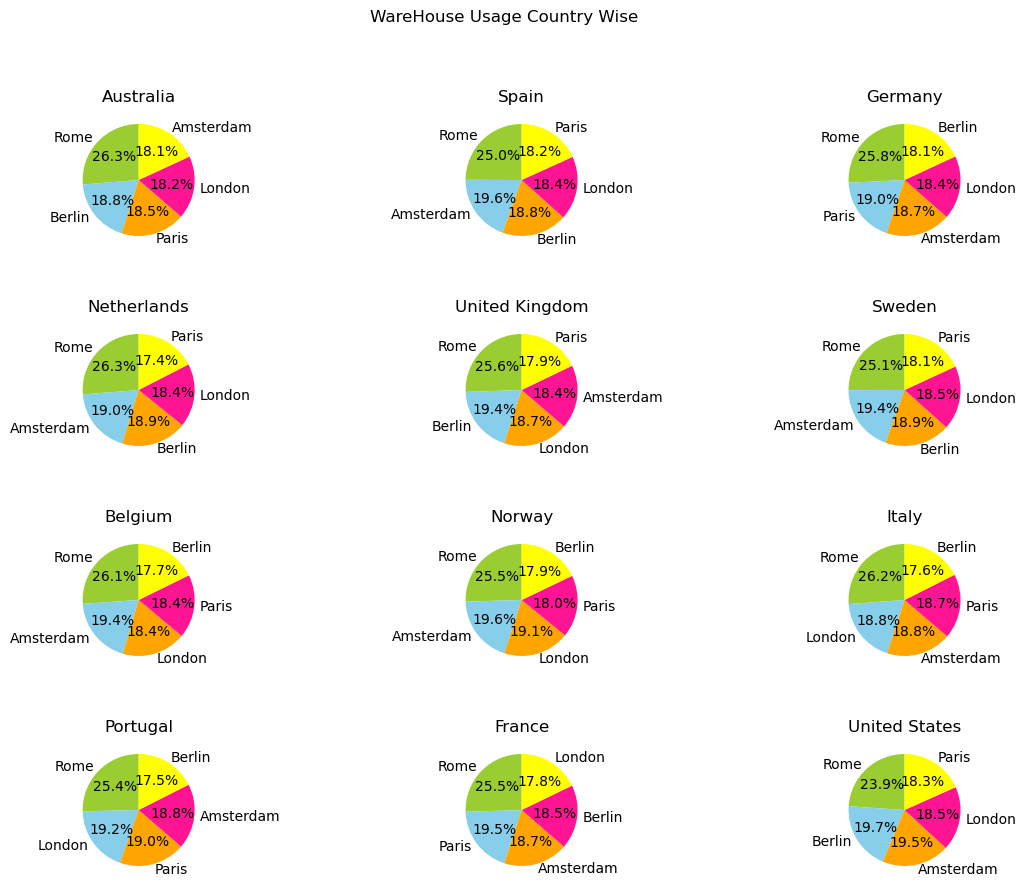

In [56]:
warehouse_usage_wrt_country = sales_df.groupby(by = 'Country')[['Country', 'WarehouseLocation']].apply(lambda x: x['WarehouseLocation'].value_counts())

countries = {}

for country in sales_df['Country']:
    warehouses = {}
    for c, ware in warehouse_usage_wrt_country.index:
        if c == country:
            warehouses[ware] = warehouse_usage_wrt_country[(c,ware)]
            countries[c] = warehouses

plt.subplots(4,3, figsize = (14, 10))
plt.subplots_adjust(hspace=.5)
plot = 1
for country in countries.keys():
    plt.subplot(4,3,plot)
    plt.pie(x = countries[country].values(), autopct='%1.1f%%', labels=countries[country].keys(), startangle=90, colors = ['yellowgreen','skyblue','orange','deeppink','yellow'])
    plt.title(country)
    plot += 1

plt.suptitle('WareHouse Usage Country Wise')
plt.show()

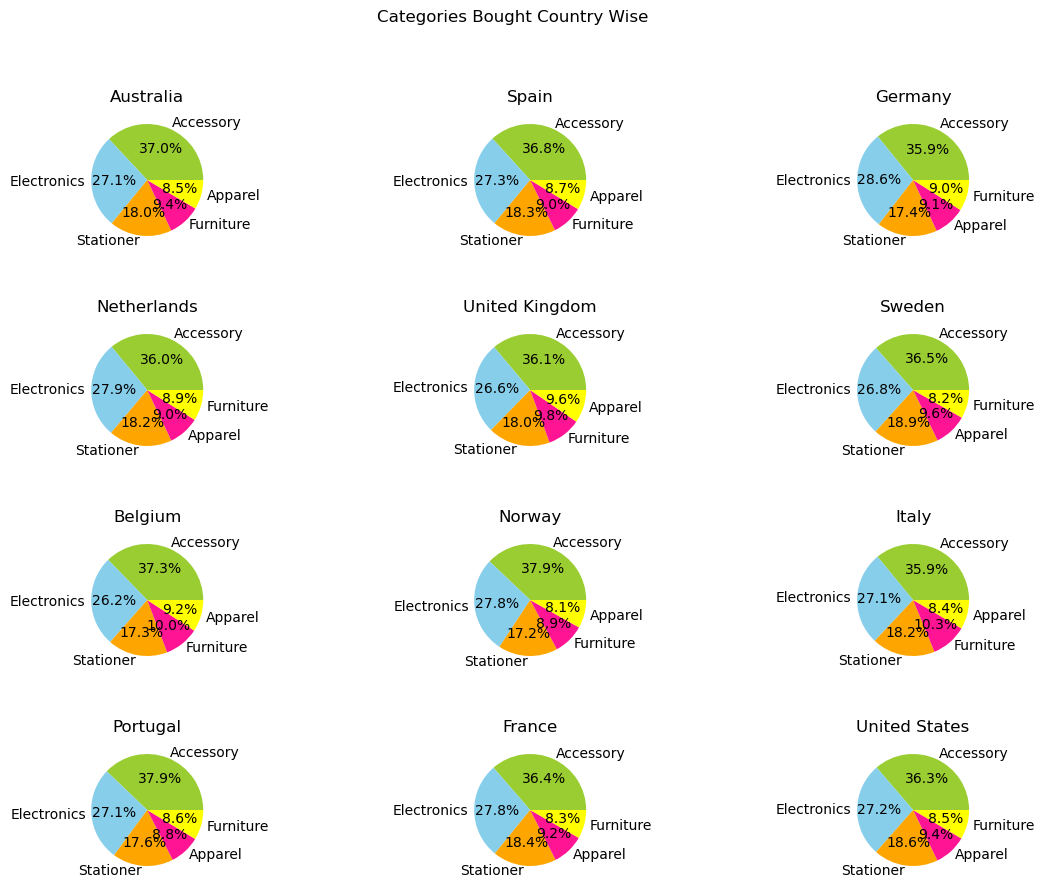

In [58]:
most_categories_country_wise = sales_df.groupby(by = 'Country')[['Country', 'Category']].apply(lambda x: x['Category'].value_counts())

countries = {}

for country in sales_df['Country']:
    categories = {}
    for c, category in most_categories_country_wise.index:
        if c == country:
            categories[category] = most_categories_country_wise[(c,category)]
            countries[c] = categories

plt.subplots(4,3, figsize = (14, 10))
plt.subplots_adjust(hspace=.5)
plot = 1
for country in countries.keys():
    plt.subplot(4,3,plot)
    plt.pie(x = countries[country].values(), autopct='%1.1f%%', labels=countries[country].keys(), colors = ['yellowgreen','skyblue','orange','deeppink','yellow'])
    plt.title(country)
    plot += 1

plt.suptitle('Categories Bought Country Wise')
plt.show()

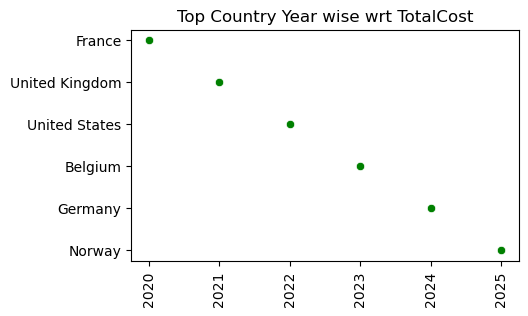

In [59]:
top_country_year_wise = sales_df.groupby(by = ['InvoiceYear', 'Country'])[['Country','TotalCost']].sum('TotalCost').sort_values(by = 'TotalCost', ascending = False).index

top_country = {}

for year in sales_df['InvoiceYear'].unique():
    for y, country in top_country_year_wise:
        if year == y:
            top_country[year] = country
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_country.keys(), y = top_country.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Country Year wise wrt TotalCost')
plt.show()

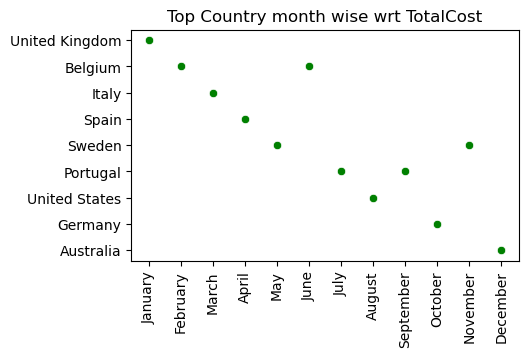

In [60]:
top_country_month_wise = sales_df.groupby(by = ['InvoiceMonth', 'Country'])[['Country','TotalCost']].sum('TotalCost').sort_values(by = 'TotalCost', ascending = False).index

top_country = {}

for month in sales_df['InvoiceMonth'].unique():
    for m, country in top_country_month_wise:
        if month == m:
            top_country[month] = country
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_country.keys(), y = top_country.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Country month wise wrt TotalCost')
plt.show()

#### Column : Discount

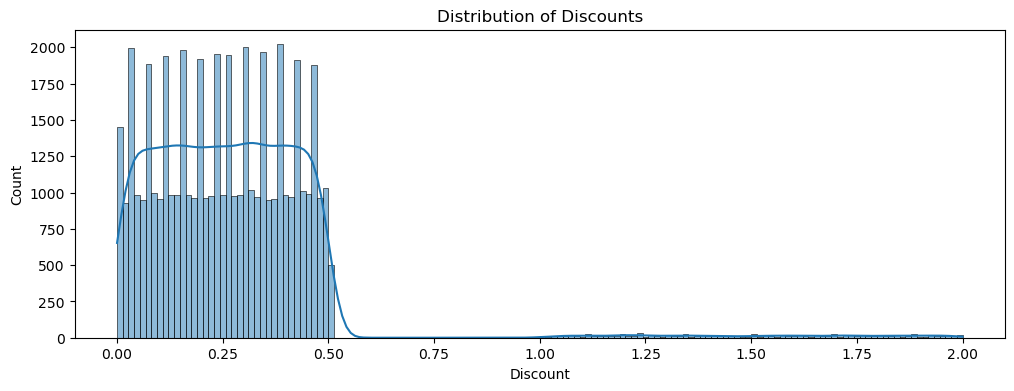

In [61]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Discount', data = sales_df, kde=True)
plt.title('Distribution of Discounts')
plt.show()

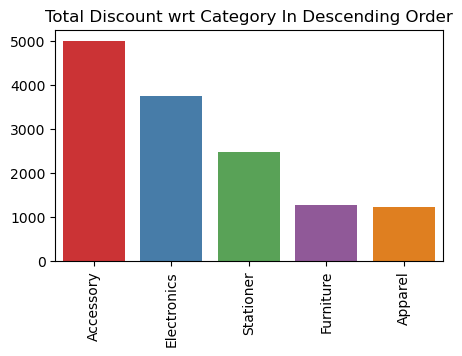

In [62]:
total_discount_wrt_category = pd.Series(dict(sales_df.groupby(by='Category')['Discount'].sum(['Discount']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_discount_wrt_category.index, y = total_discount_wrt_category, palette='Set1')
plt.title('Total Discount wrt Category In Descending Order')
plt.xticks(rotation=90)
plt.show()

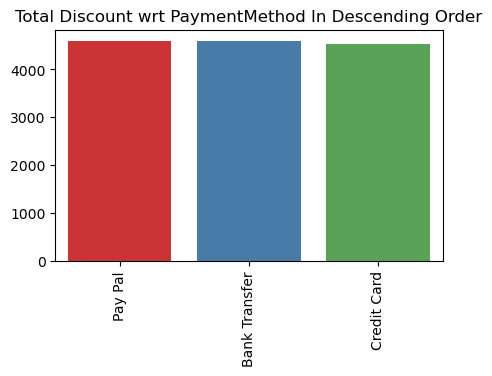

In [63]:
total_discount_wrt_pay_method = pd.Series(dict(sales_df.groupby(by='PaymentMethod')['Discount'].sum(['Discount']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_discount_wrt_pay_method.index, y = total_discount_wrt_pay_method, palette='Set1')
plt.title('Total Discount wrt PaymentMethod In Descending Order')
plt.xticks(rotation=90)
plt.show()

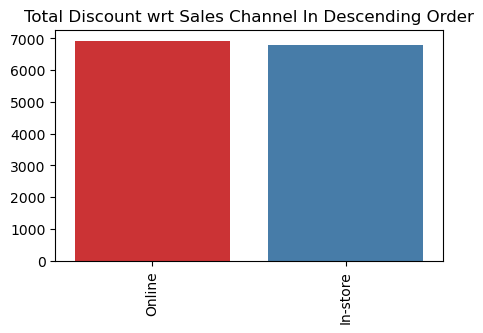

In [64]:
total_discount_wrt_sales_channel = pd.Series(dict(sales_df.groupby(by='SalesChannel')['Discount'].sum(['Discount']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_discount_wrt_sales_channel.index, y = total_discount_wrt_sales_channel, palette='Set1')
plt.title('Total Discount wrt Sales Channel In Descending Order')
plt.xticks(rotation=90)
plt.show()

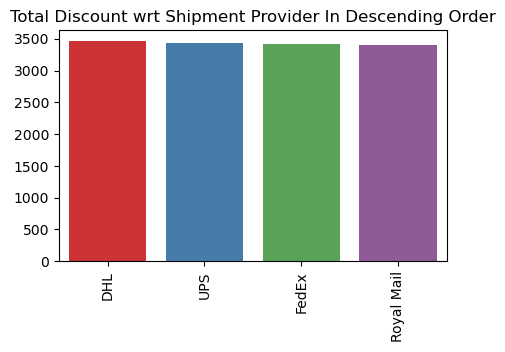

In [65]:
total_discount_wrt_ship_provider = pd.Series(dict(sales_df.groupby(by='ShipmentProvider')['Discount'].sum(['Discount']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_discount_wrt_ship_provider.index, y = total_discount_wrt_ship_provider, palette='Set1')
plt.title('Total Discount wrt Shipment Provider In Descending Order')
plt.xticks(rotation=90)
plt.show()

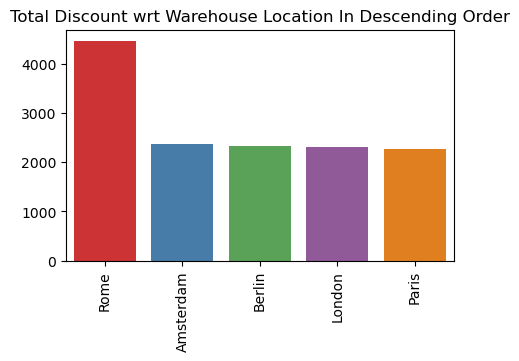

In [66]:
total_discount_wrt_warehouse = pd.Series(dict(sales_df.groupby(by='WarehouseLocation')['Discount'].sum(['Discount']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_discount_wrt_warehouse.index, y = total_discount_wrt_warehouse, palette='Set1')
plt.title('Total Discount wrt Warehouse Location In Descending Order')
plt.xticks(rotation=90)
plt.show()

#### Column : PaymentMethod

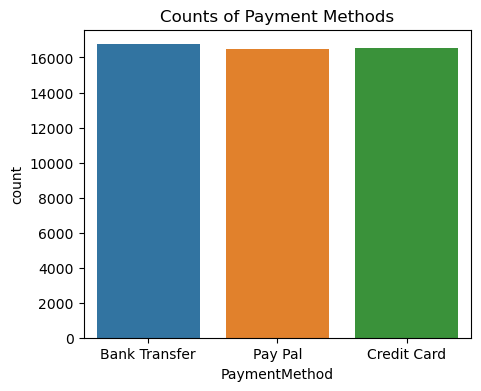

In [67]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'PaymentMethod', data = sales_df)
plt.title('Counts of Payment Methods')
plt.show()

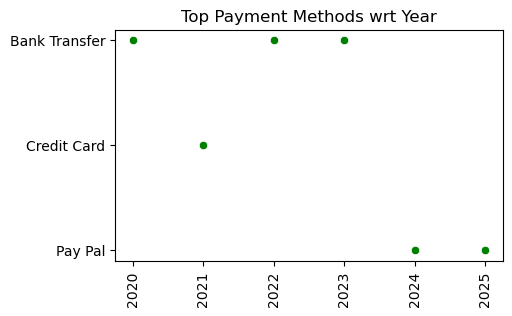

In [68]:
top_payment_method_in_wrt_year = sales_df.groupby(by = ['InvoiceYear'])[['InvoiceYear', 'PaymentMethod']].apply(lambda x: x['PaymentMethod'].value_counts()).index

top_payment_method = {}

for year in sales_df['InvoiceYear'].unique():
    for y, payment_method in top_payment_method_in_wrt_year:
        if year == y:
            top_payment_method[year] = payment_method
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_payment_method.keys(), y = top_payment_method.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Payment Methods wrt Year')
plt.show()

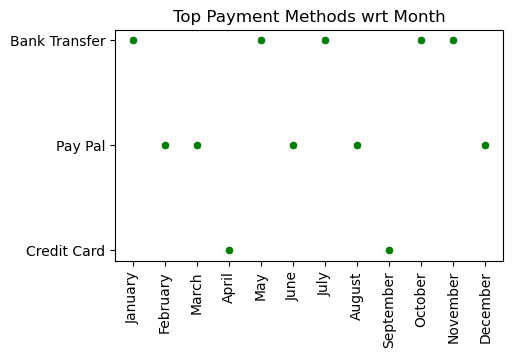

In [69]:
top_payment_method_in_wrt_month = sales_df.groupby(by = ['InvoiceMonth'])[['InvoiceMonth', 'PaymentMethod']].apply(lambda x: x['PaymentMethod'].value_counts()).index

top_payment_method = {}

for month in sales_df['InvoiceMonth'].unique():
    for m, payment_method in top_payment_method_in_wrt_month:
        if month == m:
            top_payment_method[month] = payment_method
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_payment_method.keys(), y = top_payment_method.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Payment Methods wrt Month')
plt.show()

#### Column : Shipping Cost

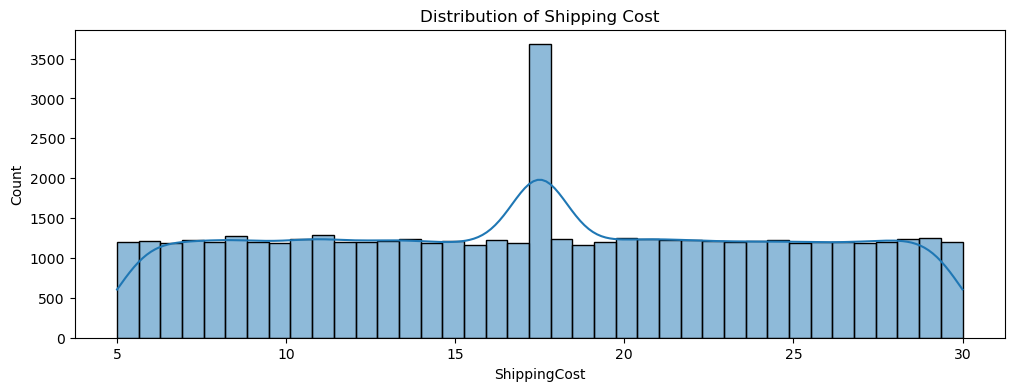

In [70]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'ShippingCost', data = sales_df, kde=True)
plt.title('Distribution of Shipping Cost')
plt.show()

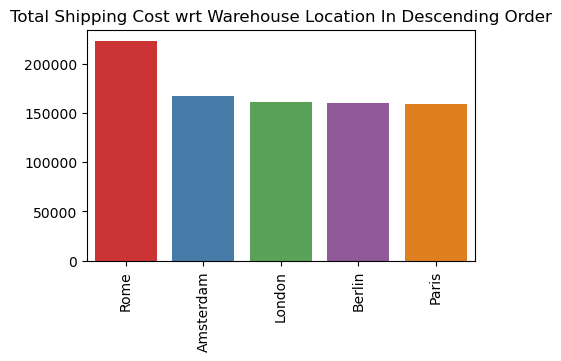

In [71]:
total_ship_cost_wrt_warehouse = pd.Series(dict(sales_df.groupby(by='WarehouseLocation')['ShippingCost'].sum(['ShippingCost']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_ship_cost_wrt_warehouse.index, y = total_ship_cost_wrt_warehouse, palette='Set1')
plt.title('Total Shipping Cost wrt Warehouse Location In Descending Order')
plt.xticks(rotation=90)
plt.show()

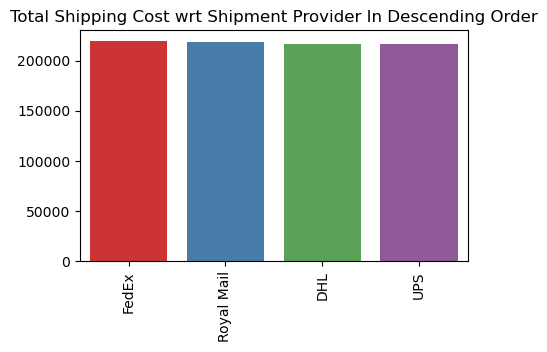

In [72]:
total_ship_cost_wrt_ship_provider = pd.Series(dict(sales_df.groupby(by='ShipmentProvider')['ShippingCost'].sum(['ShippingCost']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_ship_cost_wrt_ship_provider.index, y = total_ship_cost_wrt_ship_provider, palette='Set1')
plt.title('Total Shipping Cost wrt Shipment Provider In Descending Order')
plt.xticks(rotation=90)
plt.show()

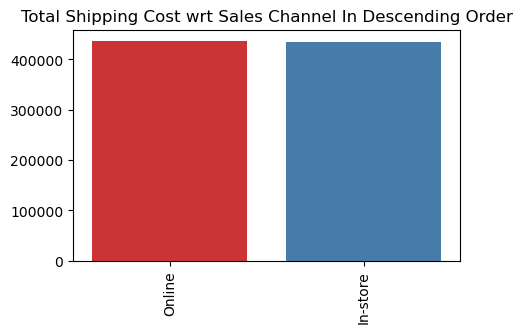

In [73]:
total_ship_cost_wrt_sales_channel = pd.Series(dict(sales_df.groupby(by='SalesChannel')['ShippingCost'].sum(['ShippingCost']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_ship_cost_wrt_sales_channel.index, y = total_ship_cost_wrt_sales_channel, palette='Set1')
plt.title('Total Shipping Cost wrt Sales Channel In Descending Order')
plt.xticks(rotation=90)
plt.show()

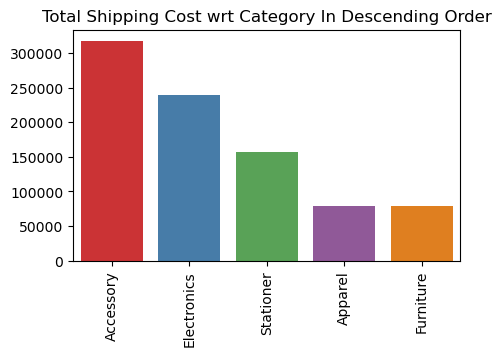

In [74]:
total_ship_cost_wrt_category = pd.Series(dict(sales_df.groupby(by='Category')['ShippingCost'].sum(['ShippingCost']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_ship_cost_wrt_category.index, y = total_ship_cost_wrt_category, palette='Set1')
plt.title('Total Shipping Cost wrt Category In Descending Order')
plt.xticks(rotation=90)
plt.show()

#### Column : Category

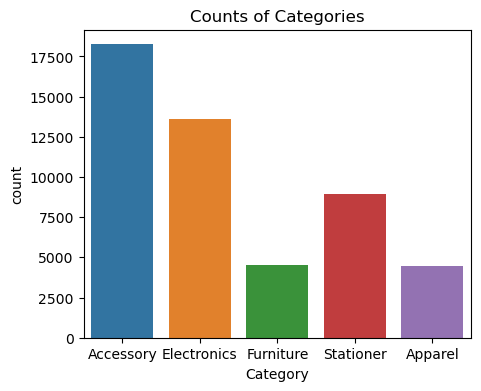

In [75]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Category', data = sales_df)
plt.title('Counts of Categories')
plt.show()

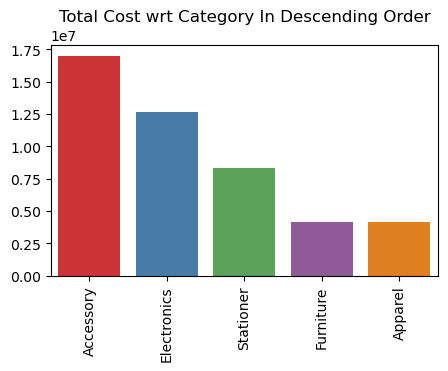

In [76]:
total_cost_wrt_category = pd.Series(dict(sales_df.groupby(by='Category')['TotalCost'].sum(['TotalCost']).sort_values(ascending = False)))

plt.figure(figsize=(5,3))
sns.barplot(x = total_cost_wrt_category.index, y = total_cost_wrt_category, palette='Set1')
plt.title('Total Cost wrt Category In Descending Order')
plt.xticks(rotation=90)
plt.show()

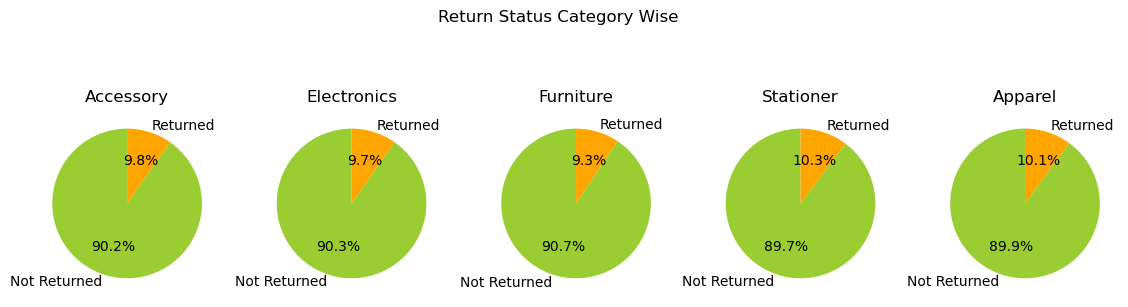

In [77]:
return_status_wrt_category = sales_df.groupby(by = 'Category')[['Category', 'ReturnStatus']].apply(lambda x: x['ReturnStatus'].value_counts())

categories = {}

for category in sales_df['Category']:
    status = {}
    for c in return_status_wrt_category.index:
        if c == category:
            status['Not Returned'] = return_status_wrt_category.loc[c,'Not Returned']
            status['Returned'] = return_status_wrt_category.loc[c,'Returned']
            categories[c] = status

plt.subplots(1,5, figsize = (14, 4))
plt.subplots_adjust(hspace=.3)
plot = 1
for category in categories.keys():
    plt.subplot(1,5,plot)
    plt.pie(x = categories[category].values(), autopct='%1.1f%%', labels=categories[category].keys(), colors=['yellowgreen','orange'], startangle=90)
    plt.title(category)
    plot += 1

plt.suptitle('Return Status Category Wise')
plt.show()

#### Column : SalesChannel

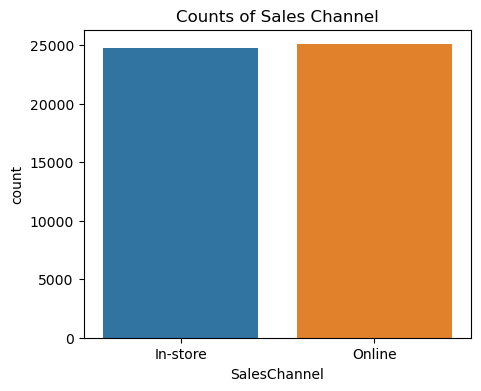

In [78]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'SalesChannel', data = sales_df)
plt.title('Counts of Sales Channel')
plt.show()

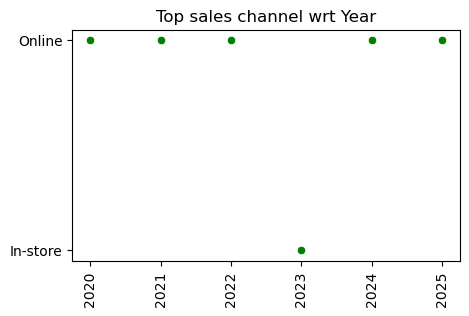

In [79]:
top_sales_channel_in_wrt_year = sales_df.groupby(by = ['InvoiceYear'])[['InvoiceYear', 'SalesChannel']].apply(lambda x: x['SalesChannel'].value_counts()).index

top_sales_channel = {}

for year in sales_df['InvoiceYear'].unique():
    for y, sales_channel in top_sales_channel_in_wrt_year:
        if year == y:
            top_sales_channel[year] = sales_channel
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_sales_channel.keys(), y = top_sales_channel.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top sales channel wrt Year')
plt.show()

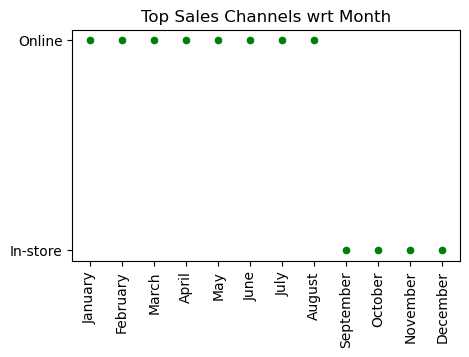

In [80]:
top_sales_channel_in_wrt_month = sales_df.groupby(by = ['InvoiceMonth'])[['InvoiceMonth', 'SalesChannel']].apply(lambda x: x['SalesChannel'].value_counts()).index

top_sales_channel = {}

for month in sales_df['InvoiceMonth'].unique():
    for m, sales_channel in top_sales_channel_in_wrt_month:
        if month == m:
            top_sales_channel[month] = sales_channel
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_sales_channel.keys(), y = top_sales_channel.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Sales Channels wrt Month')
plt.show()

#### Column : Return Status

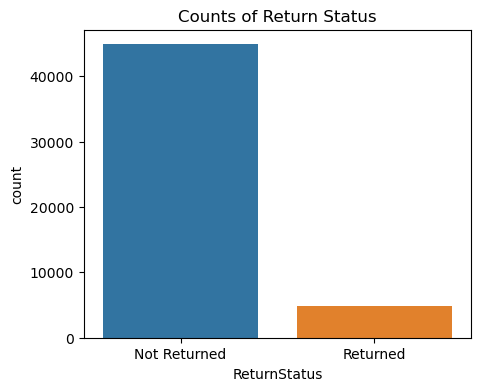

In [81]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'ReturnStatus', data = sales_df)
plt.title('Counts of Return Status')
plt.show()

#### Column : Shipment Provider

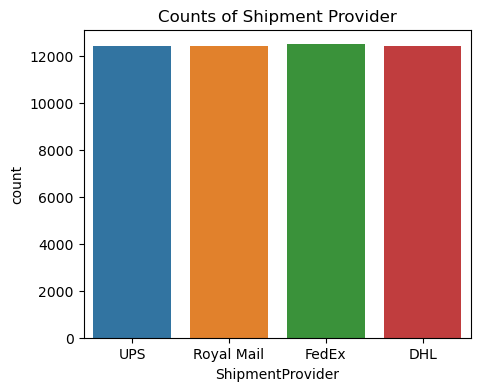

In [82]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'ShipmentProvider', data = sales_df)
plt.title('Counts of Shipment Provider')
plt.show()

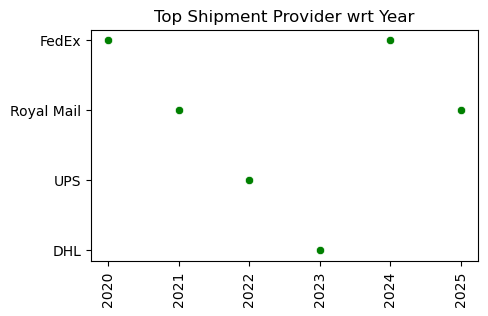

In [83]:
top_ship_provider_in_wrt_year = sales_df.groupby(by = ['InvoiceYear'])[['InvoiceYear', 'ShipmentProvider']].apply(lambda x: x['ShipmentProvider'].value_counts()).index

top_ship_provider = {}

for year in sales_df['InvoiceYear'].unique():
    for y, ship_provider in top_ship_provider_in_wrt_year:
        if year == y:
            top_ship_provider[year] = ship_provider
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_ship_provider.keys(), y = top_ship_provider.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Shipment Provider wrt Year')
plt.show()

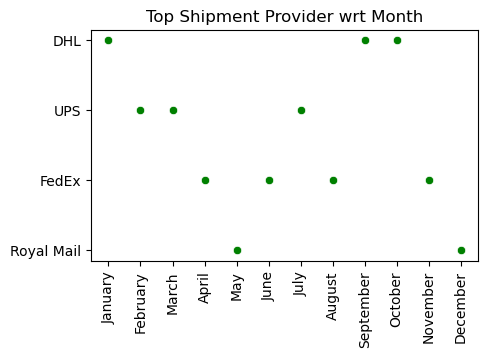

In [84]:
top_ship_provider_in_wrt_month = sales_df.groupby(by = ['InvoiceMonth'])[['InvoiceMonth', 'ShipmentProvider']].apply(lambda x: x['ShipmentProvider'].value_counts()).index

top_ship_provider = {}

for month in sales_df['InvoiceMonth'].unique():
    for m, ship_provider in top_ship_provider_in_wrt_month:
        if month == m:
            top_ship_provider[month] = ship_provider
            break

plt.figure(figsize=(5,3))
sns.scatterplot(x = top_ship_provider.keys(), y = top_ship_provider.values(), color = 'green')
plt.xticks(rotation = 90)
plt.title('Top Shipment Provider wrt Month')
plt.show()

#### Column : Warehouse Location

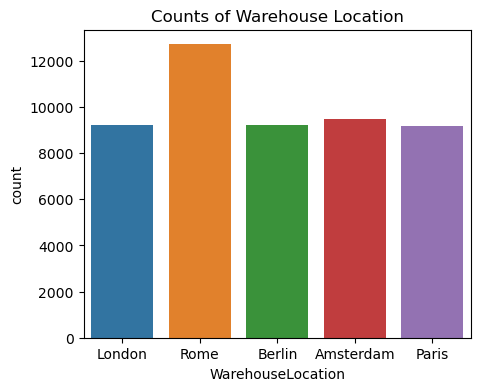

In [85]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'WarehouseLocation', data = sales_df)
plt.title('Counts of Warehouse Location')
plt.show()

#### Column : OrderPriority

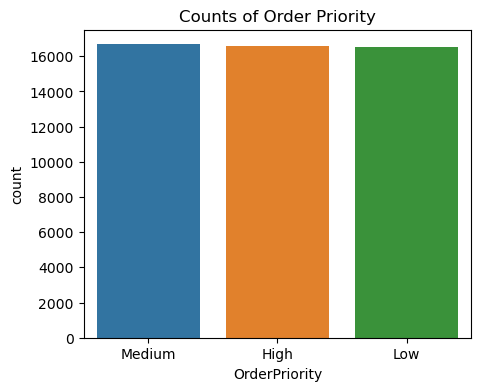

In [86]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'OrderPriority', data = sales_df)
plt.title('Counts of Order Priority')
plt.show()

#### Column : InvoiceYear

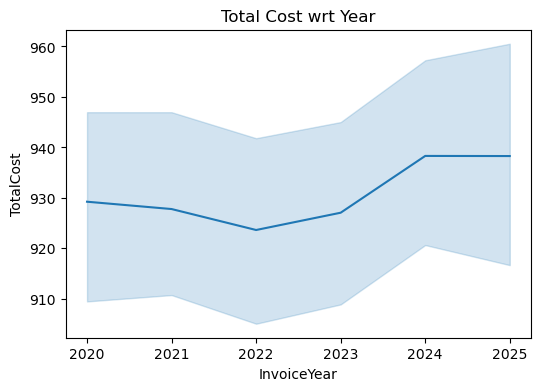

In [87]:
plt.figure(figsize = (6, 4))
sns.lineplot(x = 'InvoiceYear', y = 'TotalCost', data = sales_df)
plt.title('Total Cost wrt Year')
plt.show()

#### Column : InvoiceMonth

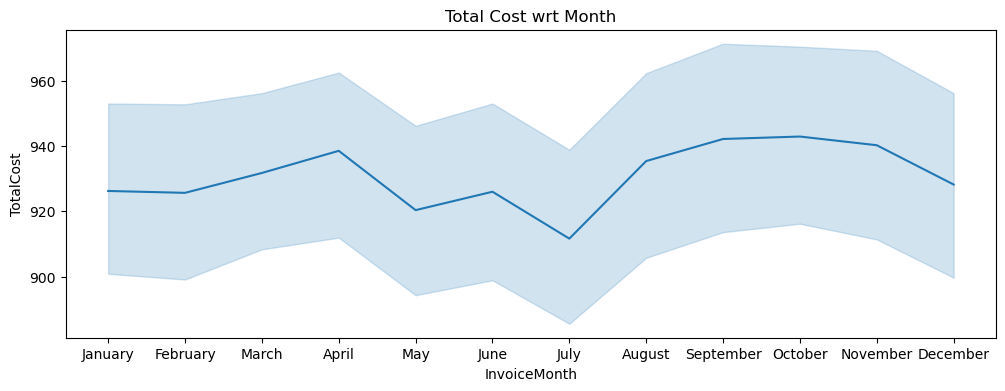

In [88]:
plt.figure(figsize = (12, 4))
sns.lineplot(x = 'InvoiceMonth', y = 'TotalCost', data = sales_df)
plt.title('Total Cost wrt Month')
plt.show()

#### Column : TotalCost

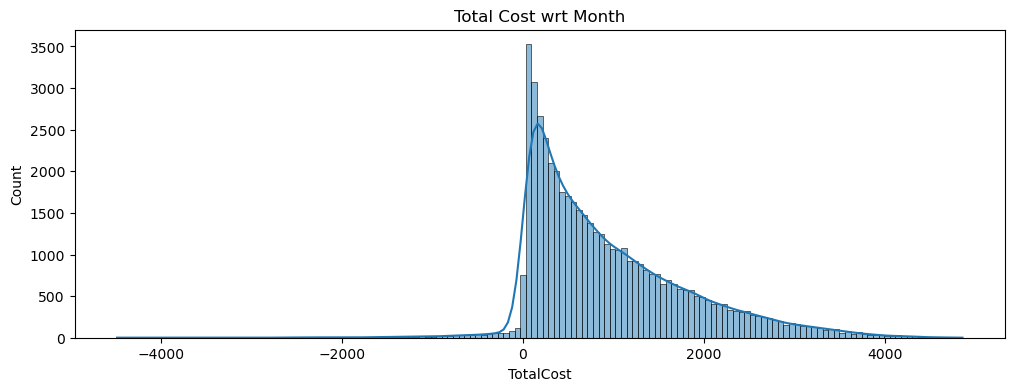

In [89]:
plt.figure(figsize = (12, 4))
sns.histplot(x = 'TotalCost', data = sales_df, kde = True)
plt.title('Total Cost wrt Month')
plt.show()